<a href="https://colab.research.google.com/github/ml2-project-team/Yahya_versions_ml2_project/blob/main/step121__yahyaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CreditCard Dataset

This project offers an applied route into data science, with a focus on applying unsupervised learning techniques to extract underlying patterns within financial transactions. Through pre-processing data, clustering, and outliers detection, we aim to transform raw data into meaningful insight. The project involves heavy experimentation, visualization, and model validation, emphasizing the intricacies of working with imbalanced, high-dimensional data.

In [ ]:
!pip install kneed

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer
import kagglehub
import os
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,MiniBatchKMeans,DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from kneed import KneeLocator
import time
import psutil
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM

# Load Data

In [ ]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
csv_path = os.path.join(path, "creditcard.csv")
creditcard = pd.read_csv(csv_path)

In [ ]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Overview

In [ ]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Summary statistics
creditcard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
#check for missing values
print('Missing values:')
creditcard.isnull().sum()

Missing values:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


The dataset does not contain any missing values


# Features Distribution

In [ ]:
X=creditcard.drop('Class',axis=1)
y=creditcard['Class']

In [ ]:
'''sample = creditcard.sample(1000)
sns.pairplot(sample, hue='Class')'''

"sample = creditcard.sample(1000)\nsns.pairplot(sample, hue='Class')"

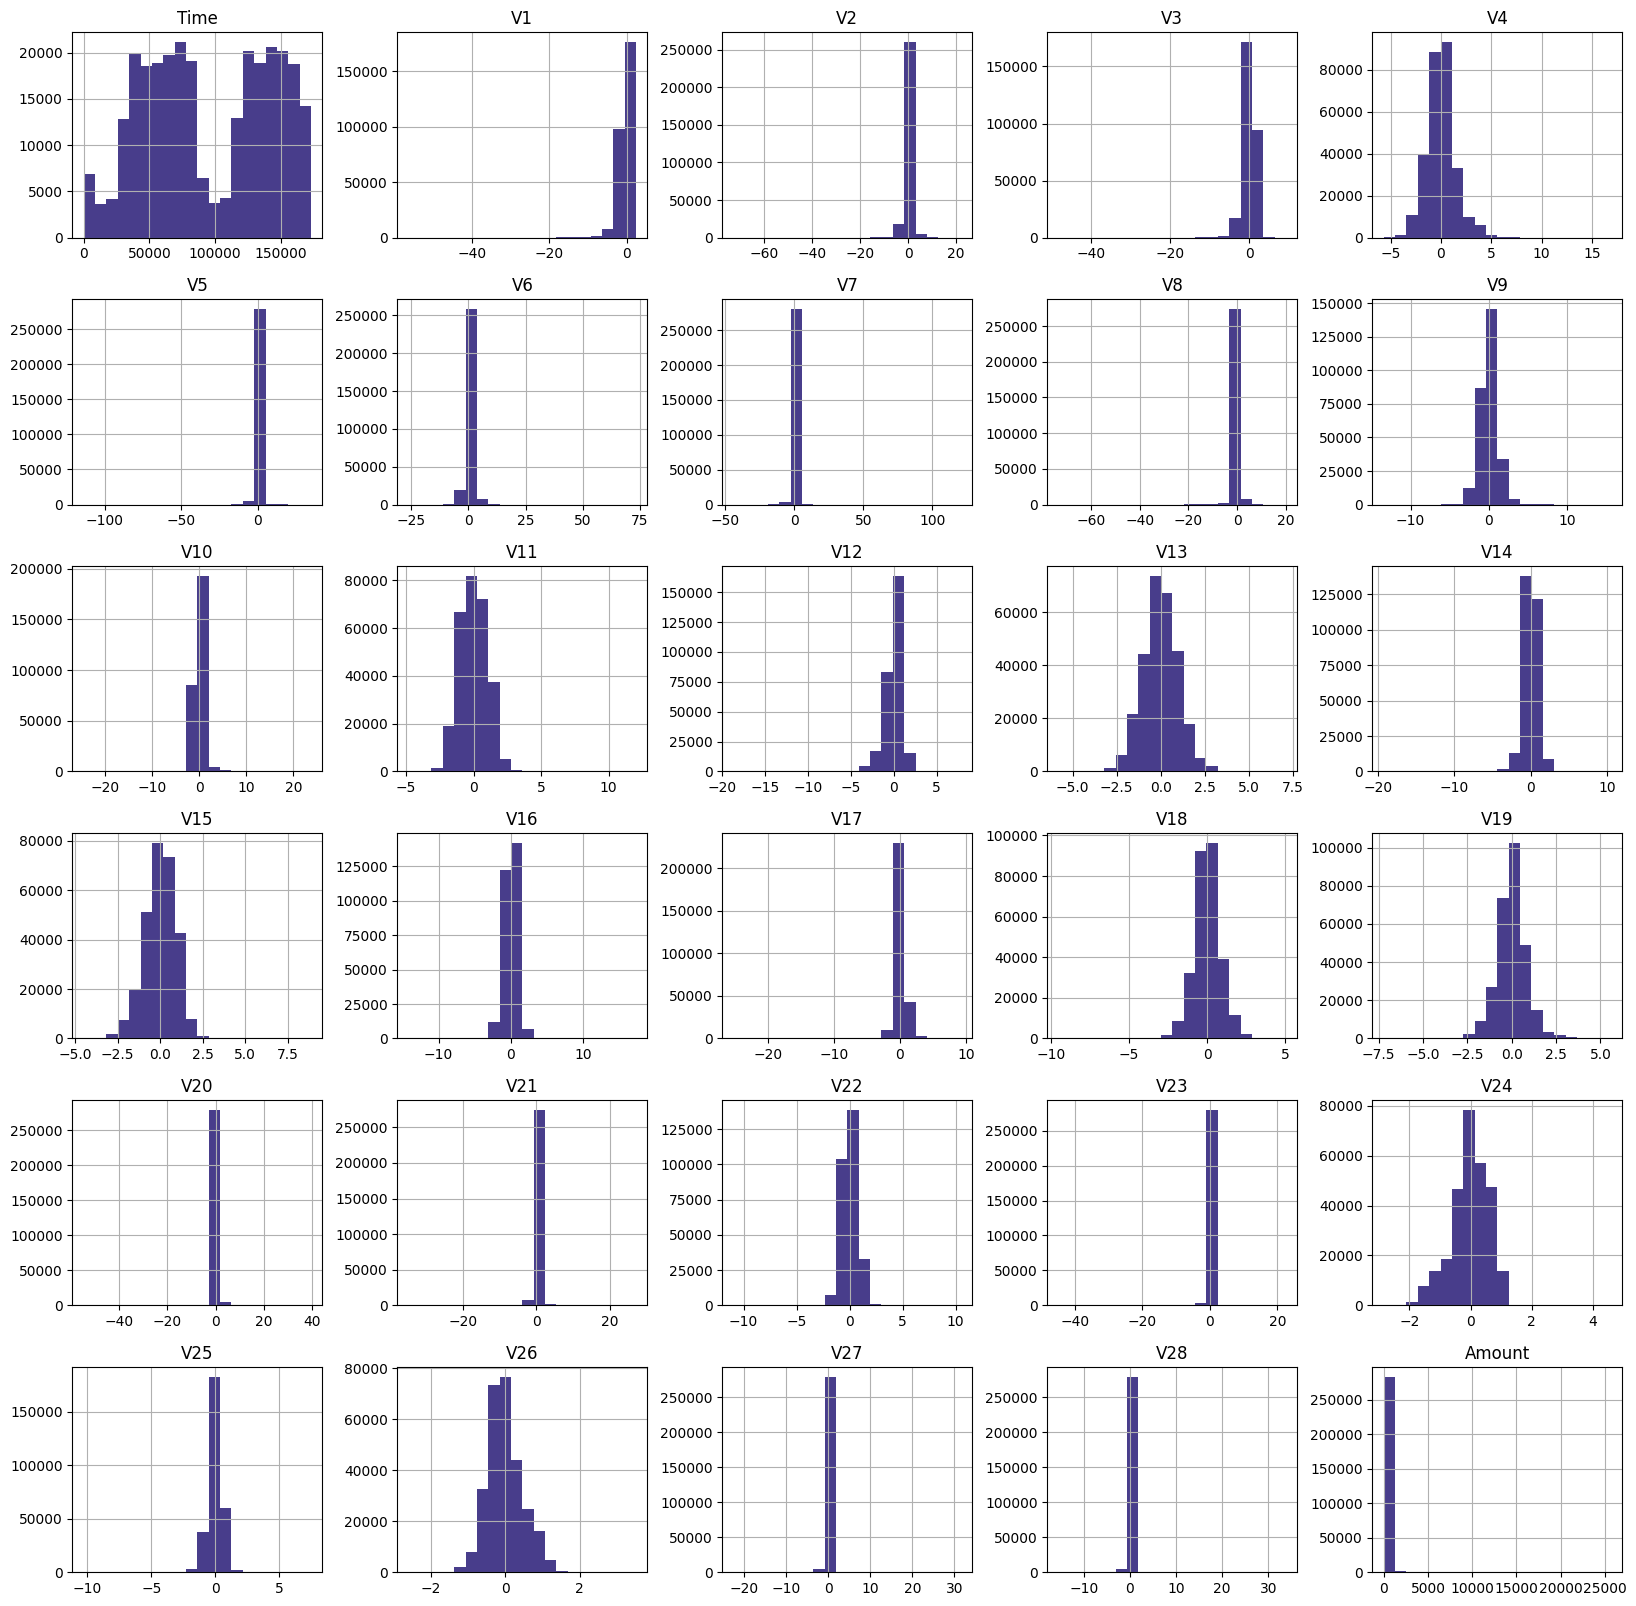

In [ ]:
X.hist(figsize=(20,20),bins=20,color='#483D8B')
plt.show()

The histograms show the distribution of each feature in the dataset. Most features (V1–V28) are centered around zero and follow a roughly normal distribution, which is expected after PCA transformation. The Amount and Time features are skewed, indicating most transactions are low in value and occur in specific time periods

<Axes: xlabel='Time', ylabel='Count'>

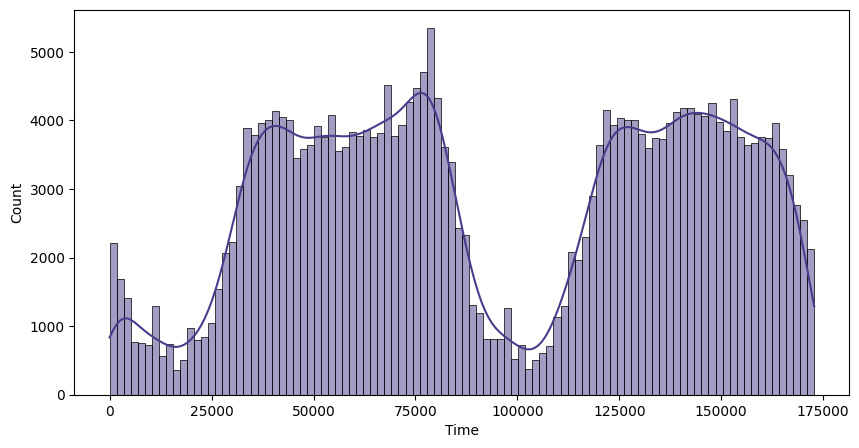

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(X['Time'],kde=True,bins=100,color='#483D8B')

The distribution of Time **shows multiple peaks**, indicating that transactions occur in specific time intervals rather than uniformly throughout the day.

<Axes: xlabel='Amount', ylabel='Count'>

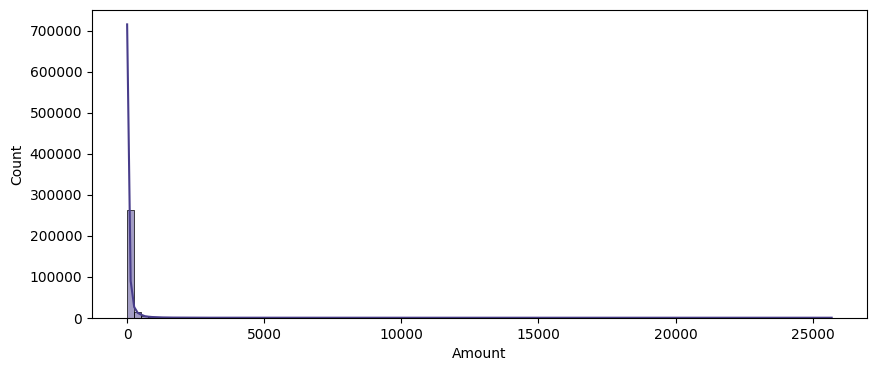

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(X['Amount'],kde=True,bins=100,color='#483D8B')

The Amount distribution is **highly right-skewed**, meaning most transactions are of low value, with a few high-value outliers.

In [ ]:
skewed_features = X.skew().sort_values(ascending=False)
skewed_features

,0
Amount,16.977724
V28,11.192091
V21,3.592991
V7,2.553907
V6,1.826581
V10,1.187141
V4,0.676292
V26,0.576693
V9,0.554680
V11,0.356506


In [ ]:
Q75=X.quantile(0.75)
Q25=X.quantile(0.25)
IQR=Q75-Q25
min_point= Q25- IQR*1.5
max_point= Q75+ IQR*1.5
Outliers=((X<min_point)|(X>max_point))
print(Outliers.sum())

Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
dtype: int64


Based on the IQR method, several features contain a large number of outliers, especially V27, V28, Amount, and V20. This is expected in fraud detection datasets, as abnormal transactions often deviate significantly from typical patterns. These outliers should not be removed blindly, as they may represent fraudulent behavior and are potentially valuable for anomaly detection models.

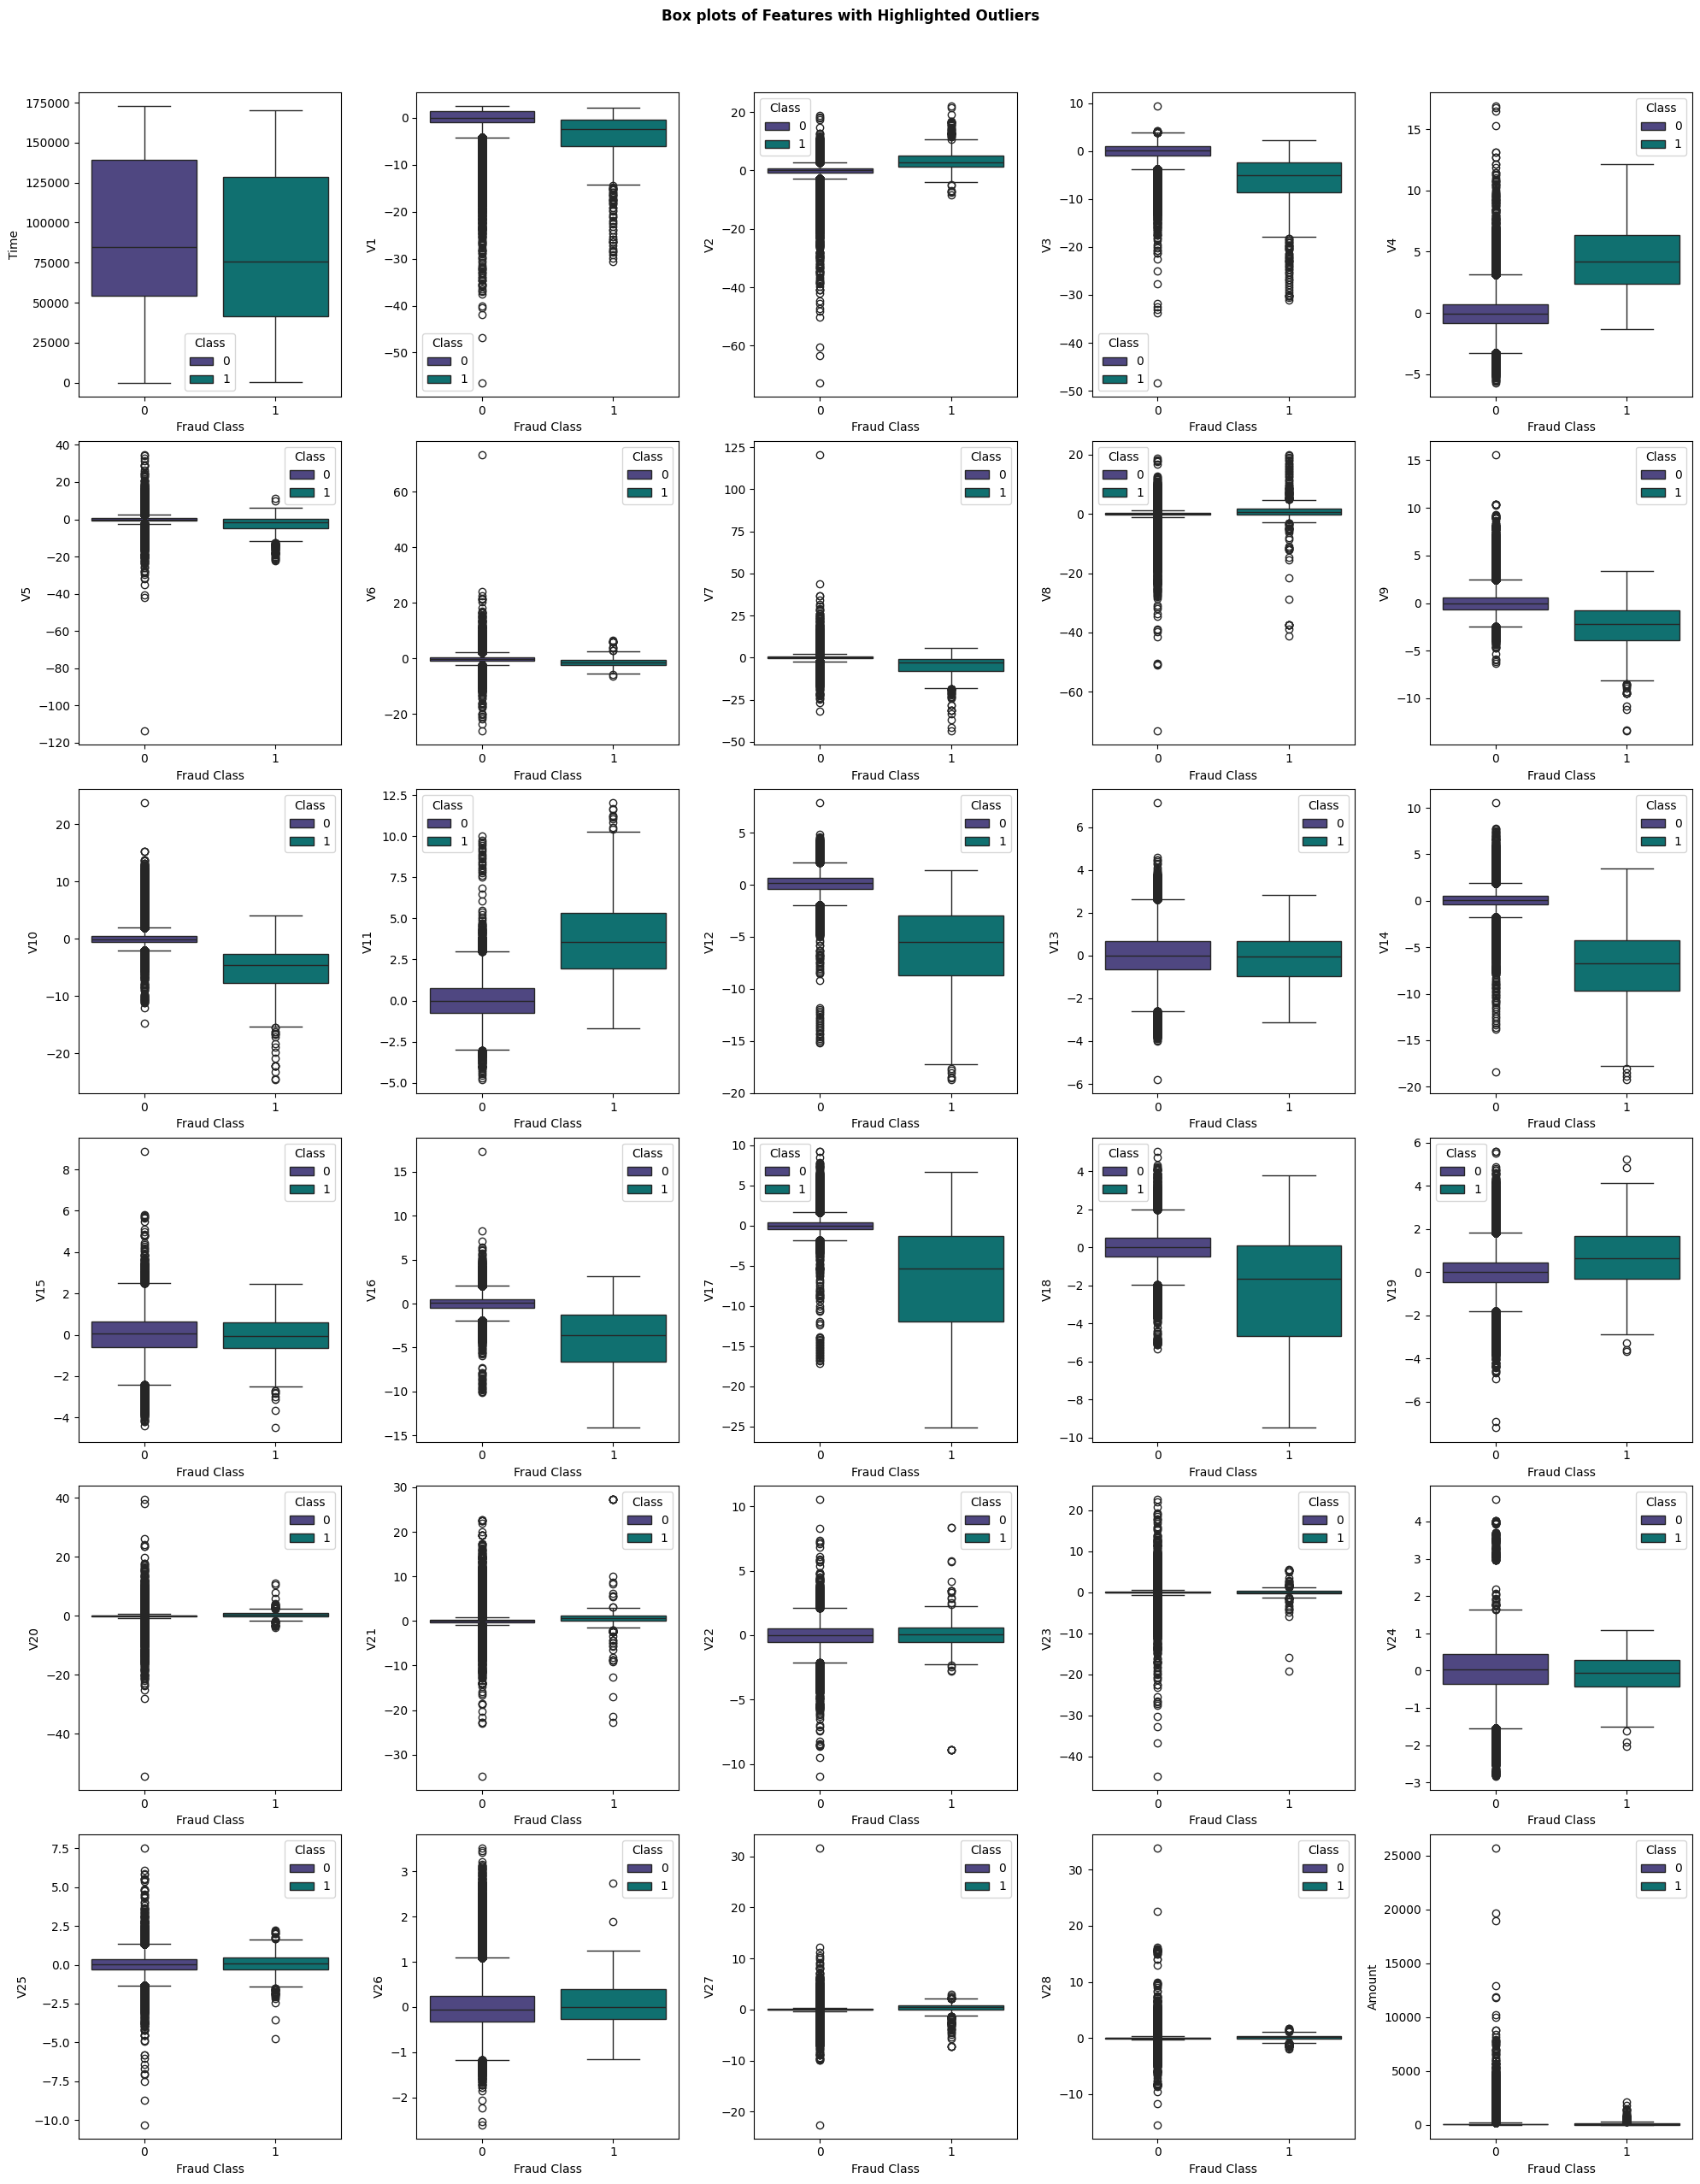

In [ ]:
fig,ax=plt.subplots(6,5,figsize=(20,25))
ax=ax.flatten()

for r,c in enumerate(creditcard.columns[:-1]):
    sns.boxplot(data=creditcard,x='Class',ax=ax[r],hue='Class',y=c,palette=['#483D8B','#008080'])
    ax[r].set_xlabel('Fraud Class')


fig.suptitle('Box plots of Features with Highlighted Outliers',weight='bold',y=1.02)
fig.tight_layout(h_pad=0.3)
plt.show()

Boxplots reveal that features like (V4, V10, V12, V14, and Amount) have significant distribution differences between fraudulent and non-fraudulent transactions. Additionally, a high presence of outliers—especially in fraudulent cases—suggests that anomalies in feature values can be strong indicators of fraud.

Text(0.5, 1.0, 'Correlation Matrix')

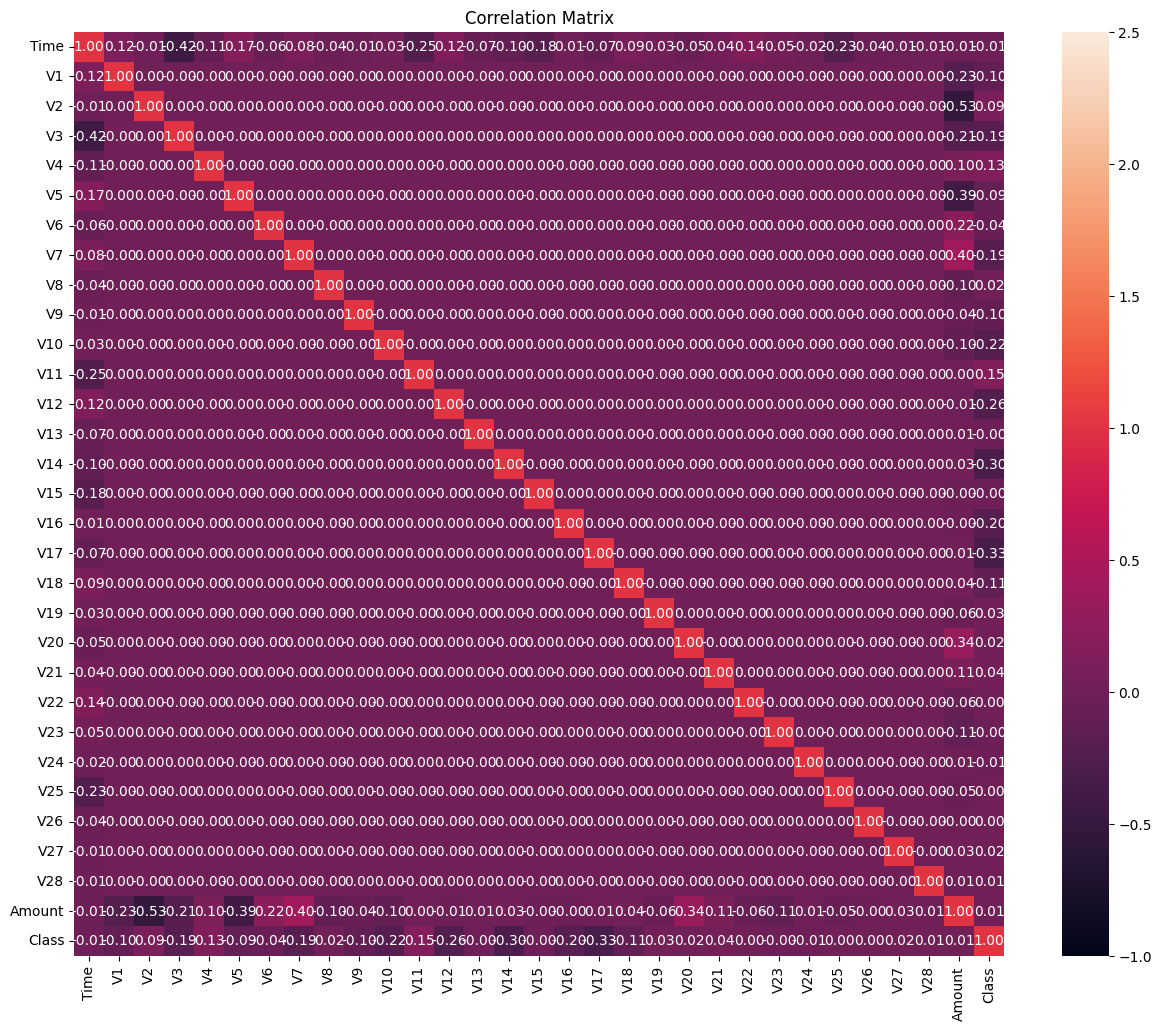

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(creditcard.corr(),annot=True,fmt=".2f", vmin=-1, vmax=2.5)
plt.title('Correlation Matrix')

In [ ]:
threshold = 0.9
FeaturesCorr=X.corr().abs()
for feature in FeaturesCorr.columns:

    high_corr = FeaturesCorr[feature][(FeaturesCorr[feature] > threshold) & (FeaturesCorr[feature] < 1)].index.tolist()

high_corr

[]

Since these components are derived from PCA, it is expected that they are uncorrelated, as PCA transforms the original features into a new set of linearly uncorrelated components.

**NO**
features in the dataset have a correlation higher than 0.9 with each other.

# Class Distribution

Text(0.5, 1.0, 'Class Distribution')

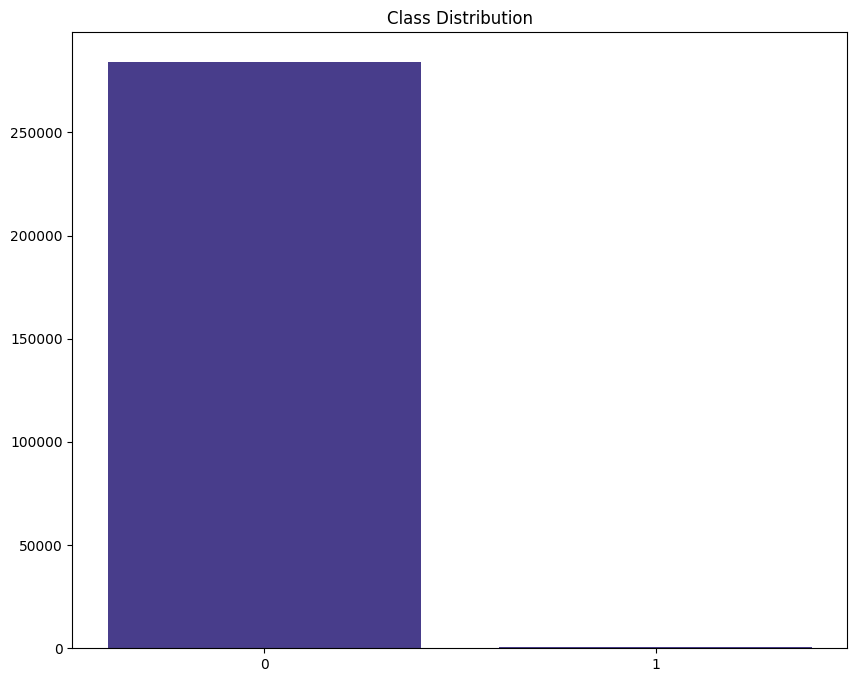

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(y.unique(),y.value_counts(),color='#483D8B')
ax.set_xticks(y.unique())
ax.set_title('Class Distribution')

In [ ]:
y.value_counts()

,count
Class,
0,284315
1,492


Text(0.5, 1.0, 'Class Distribution')

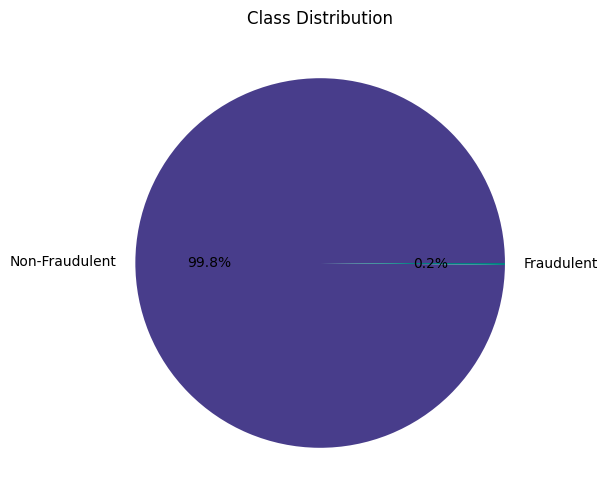

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(y.value_counts(),labels=['Non-Fraudulent','Fraudulent'],autopct='%1.1f%%',colors=['#483D8B','#008080'])
plt.title('Class Distribution')

The dataset **is highly imbalanced** , with approximately  **99.8%** of the transactions labeled as *non-fraudulent* and only**0.2%**as *fraudulent*. This class imbalance must be addressed before training a model to avoid biased predictions.

In [ ]:
percentage = (y.value_counts() / len(y))*100
print(max(percentage)-min(percentage))

99.65450287387598


The difference between the class percentages is 99.6, highlighting a severe class imbalance in the dataset

Number of components to retain 90% variance: 27


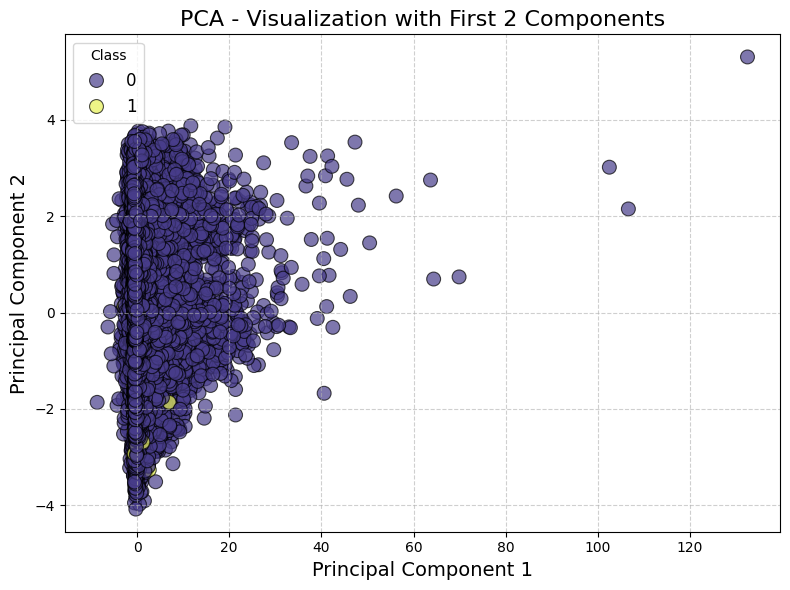

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


pca = PCA(n_components=0.93)
X_pca = pca.fit_transform(X_scaled)
print("Number of components to retain 90% variance:" ,pca.n_components_)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['Label'] = y.values


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette=['#483D8B','#E7F255'], s=100, alpha=0.7, edgecolor='k', marker='o')
plt.title('PCA - Visualization with First 2 Components', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Class', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



PCA plot showing the data in 2D using the top two principal components. Points are colored by true class labels: blue for Class 0 and orange for Class 1. The goal here is only visualization as part of EDA, not actual dimensionality reduction for modeling

The PCA visualization reveals a highly imbalanced dataset, with Class 0 overwhelmingly more frequent than Class 1. Additionally, there is no clear linear separation between the two classes in the reduced 2D space, suggesting that more complex or non-linear models may be needed for effective classification

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11392 samples in 0.002s...
[t-SNE] Computed neighbors for 11392 samples in 1.693s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11392
[t-SNE] Computed conditional probabilities for sample 2000 / 11392
[t-SNE] Computed conditional probabilities for sample 3000 / 11392
[t-SNE] Computed conditional probabilities for sample 4000 / 11392
[t-SNE] Computed conditional probabilities for sample 5000 / 11392
[t-SNE] Computed conditional probabilities for sample 6000 / 11392
[t-SNE] Computed conditional probabilities for sample 7000 / 11392
[t-SNE] Computed conditional probabilities for sample 8000 / 11392
[t-SNE] Computed conditional probabilities for sample 9000 / 11392
[t-SNE] Computed conditional probabilities for sample 10000 / 11392
[t-SNE] Computed conditional probabilities for sample 11000 / 11392
[t-SNE] Computed conditional probabilities for sample 11392 / 11392
[t-SNE] Mean sigma: 138.415660
[t-SNE] KL divergen

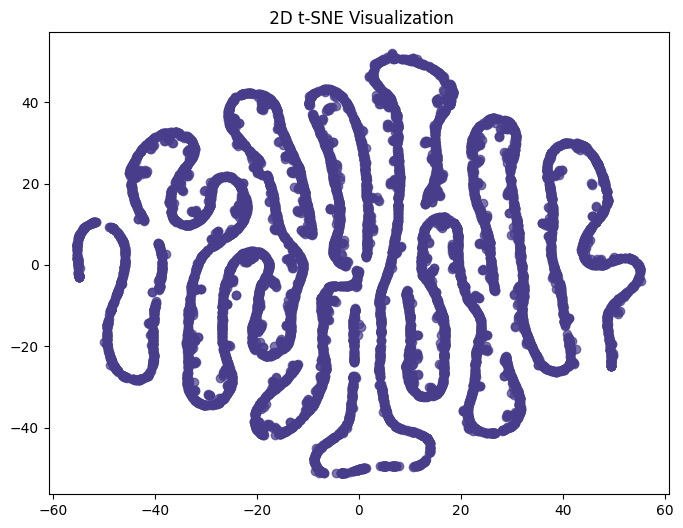

In [ ]:
X_sample, _ = train_test_split(X, train_size=0.04, random_state=42, stratify=y)

tsne=TSNE(n_components=2,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_tsne=tsne.fit_transform(X_sample)


plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7,color='#483D8B')
plt.title(' 2D t-SNE Visualization')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
plt.show()

# Preprocessing

Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#stratify=y ensures that the split maintains the same distribution of labels as in y

Although the task is unsupervised, I split the data into training and testing sets to ensure fair evaluation of the algorithms and avoid data leakage. This allows me to fit transformations like scaling and PCA only on the training data and then apply them to the test set, simulating how the model would perform on unseen data. It is especially important when applying anomaly detection techniques like One-Class SVM and Isolation Forest, which assume the training data represents the normal behavior.

# Feature Engineering

In [ ]:
#X['Hours']=(X['Time']//3600)%24

In [ ]:
'''fraud_per_hour= X[y==1].groupby(X['Hours']).size()# Count fraud cases per hour
fraud_counts=fraud_per_hour.to_dict()
X['FraudCounts']=X['Hours'].map(fraud_counts).fillna(0)

for hour, count in sorted(fraud_per_hour.items()):
    print(f"Hour {hour}: {count} Fraudulent Transactions")

plt.figure(figsize=(10,6))
sns.barplot(x=X['Hours'].unique(),y=fraud_per_hour.values)
plt.title('Fraudulent Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()'''

'fraud_per_hour= X[y==1].groupby(X[\'Hours\']).size()# Count fraud cases per hour\nfraud_counts=fraud_per_hour.to_dict()\nX[\'FraudCounts\']=X[\'Hours\'].map(fraud_counts).fillna(0)\n\nfor hour, count in sorted(fraud_per_hour.items()):\n    print(f"Hour {hour}: {count} Fraudulent Transactions")\n\nplt.figure(figsize=(10,6))\nsns.barplot(x=X[\'Hours\'].unique(),y=fraud_per_hour.values)\nplt.title(\'Fraudulent Transactions per Hour\')\nplt.xlabel(\'Hour of the Day\')\nplt.ylabel(\'Number of Fraudulent Transactions\')\nplt.show()'

We initially considered adding a feature representing the number of fraud cases per hour (FraudCounts). However, since this feature would be derived using the target labels (y), it introduces the risk of data leakage. Using such a feature would allow the model to indirectly access information about the target during training, which can lead to overly optimistic results and poor generalization.
Therefore, we decided not to include this feature to maintain the integrity of the unsupervised learning process.

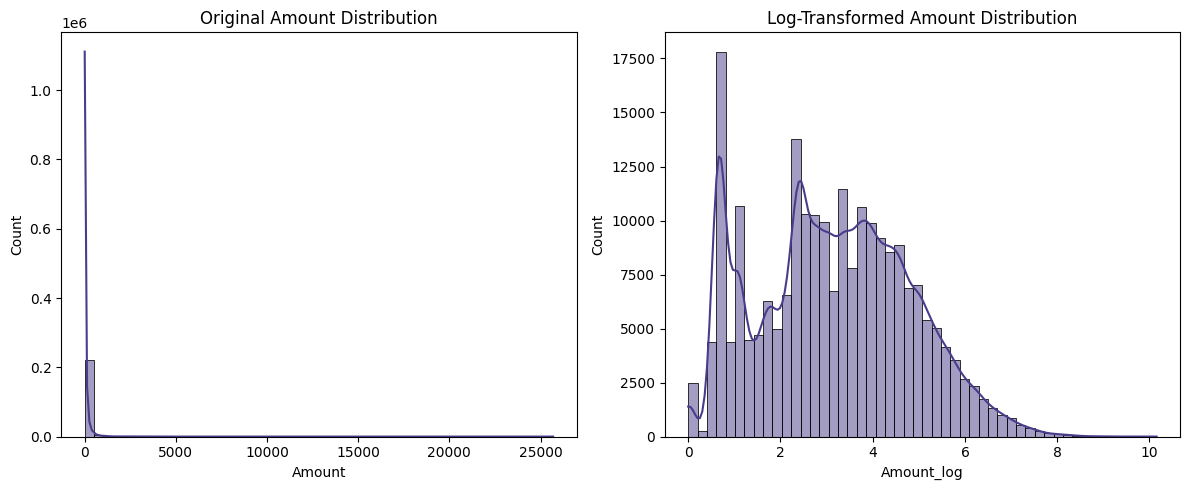

In [ ]:
# Apply log transformation to the Amount column
X_train['Amount_log'] = np.log1p(X_train['Amount'])
X_test['Amount_log'] = np.log1p(X_test['Amount'])


# Plot original and transformed distributions
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['Amount'], bins=50, kde=True,color='#483D8B')
plt.title('Original Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(X_train['Amount_log'], bins=50, kde=True,color='#483D8B')
plt.title('Log-Transformed Amount Distribution')

plt.tight_layout()
plt.show()

We applied a log1p transformation to the Amount feature to reduce right skewness and make the distribution more normal-like, which can help with model performance. Since this new feature is mathematically derived from the original, **it may cause multicollinearity**. We will later check for multicollinearity before deciding whether to drop the original Amount feature.



In [ ]:
X_train[['Amount','Amount_log']].corr()

,Amount,Amount_log
Amount,1.000000,0.548568
Amount_log,0.548568,1.000000


We created a log-transformed version of the Amount feature (Amount_log) to reduce skewness. After evaluating both features in a separate notebook — including clustering metrics and anomaly detection performance — we found that the results were nearly identical.
Additionally, a correlation check showed no strong multicollinearity between Amount and Amount_log.
Therefore, we decided to keep only one to avoid redundancy, while noting that using either will not negatively affect model performance.

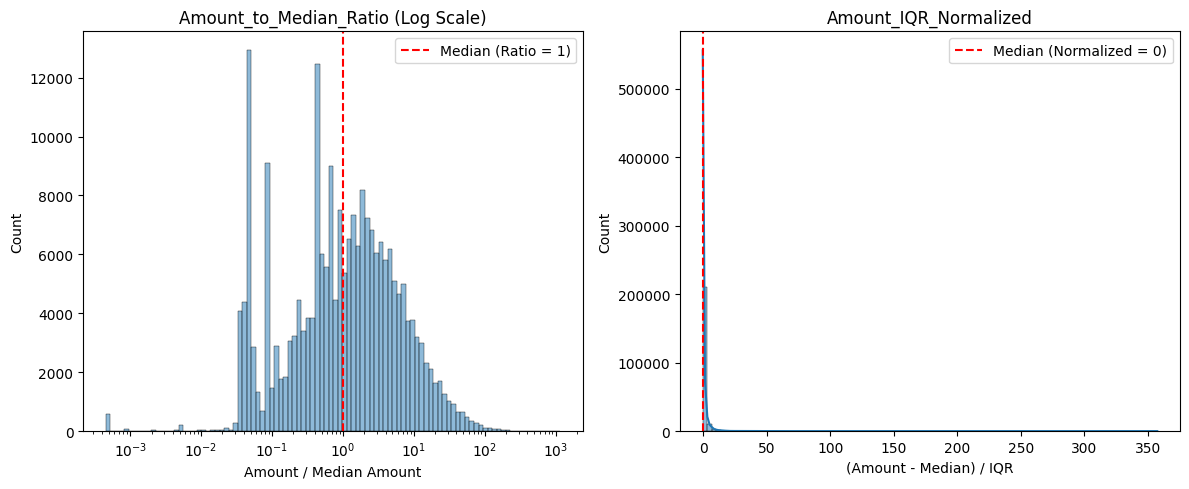

In [ ]:
# Compute median and IQR for 'Amount'
median_amount = X_train['Amount'].median()
iqr = X_train['Amount'].quantile(0.75) - X_train['Amount'].quantile(0.25)

# Add new features to X
X_train['Amount_to_Median_Ratio'] = X_train['Amount'] / (median_amount + 1e-6)  # Avoid division by zero
X_test['Amount_to_Median_Ratio'] = X_test['Amount'] / (median_amount + 1e-6)


X_train['Amount_IQR_Normalized'] = (X_train['Amount'] - median_amount) / (iqr + 1e-6)
X_test['Amount_IQR_Normalized'] = (X_test['Amount'] - median_amount) / (iqr + 1e-6)


plt.figure(figsize=(12, 5))

# Plot 1: Amount_to_Median_Ratio
plt.subplot(1, 2, 1)
sns.histplot(X_train['Amount_to_Median_Ratio'], bins=100, kde=True, log_scale=True)
plt.axvline(x=1, color='red', linestyle='--', label='Median (Ratio = 1)')
plt.title('Amount_to_Median_Ratio (Log Scale)')
plt.xlabel('Amount / Median Amount')
plt.legend()

# Plot 2: Amount_IQR_Normalized
plt.subplot(1, 2, 2)
sns.histplot(X_train['Amount_IQR_Normalized'], bins=100, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label='Median (Normalized = 0)')
plt.title('Amount_IQR_Normalized')
plt.xlabel('(Amount - Median) / IQR')
plt.legend()

plt.tight_layout()
plt.show()

1. Amount_to_Median_Ratio

Why This Feature?

Captures Relative Scale:

Fraudulent transactions often deviate significantly from typical spending amounts.

Dividing by the median (instead of mean) makes the feature robust to outliers.

Unsupervised-Friendly:

Does not require labeled fraud data.

Highlights transactions that are abnormally large or small compared to the median.

Interpretation:

Ratio ≈ 1: Transaction is close to the median (normal behavior).

Ratio ≫ 1: Unusually large transaction (potential fraud).

Ratio ≪ 1: Unusually small transaction (may indicate test transactions or errors).

Example:

If the median transaction is $50, a $500 transaction has a ratio of 10, flagging it as anomalous.



2. Amount_IQR_Normalized

Why This Feature?

Standardizes Deviations:

Measures how far a transaction is from the median, scaled by the IQR (a robust measure of spread).

Better than Z-score (which uses mean/std) because it’s resistant to outliers.

Anomaly Detection:

Values beyond ±3 are statistically rare (3×IQR rule).

Fraud often falls in these extremes.

Interpretation:

Value ≈ 0: Transaction is near the median (normal).

Value > +3: Extremely high amount (possible fraud).

Value < -3: Extremely low amount (may be suspicious).


# Fix skewness

In [ ]:
X_train_skewed_features = X_train.skew().sort_values(ascending=False)

In [ ]:
skewed_features2=X_train_skewed_features[abs(X_train_skewed_features.values)>0.75]
print(skewed_features2)
skewed_features2=skewed_features2.index

Amount                    18.193943
Amount_IQR_Normalized     18.193943
Amount_to_Median_Ratio    18.193943
V28                        9.978409
V21                        3.490183
V7                         3.152665
V6                         1.937381
V10                        1.132688
V27                       -0.890209
V16                       -1.077909
V20                       -1.960492
V14                       -1.969112
V3                        -2.247962
V12                       -2.286654
V5                        -2.786851
V1                        -3.306334
V17                       -3.733377
V2                        -4.779484
V23                       -6.258558
V8                        -8.639485
dtype: float64


In [ ]:
yj=PowerTransformer(method='yeo-johnson')

X_train[skewed_features2] =yj.fit_transform(X_train[skewed_features2])

In [ ]:
after_fixed=X_train.skew().sort_values(ascending=False)
after_fixed

,0
V27,3.731696
V7,2.883669
V8,2.382707
V28,1.320689
V4,0.687574
V26,0.574980
V9,0.541869
Amount_IQR_Normalized,0.417497
V11,0.354102
V2,0.336876


In [ ]:
new_skewed_features=after_fixed[abs(after_fixed.values)>0.75].index
qt = QuantileTransformer(output_distribution='normal', random_state=42)
X_train[new_skewed_features] =qt.fit_transform(X_train[new_skewed_features])

#just apply the transform on the X_test
X_test[new_skewed_features] =qt.transform(X_test[new_skewed_features])

In [ ]:
X_train.skew().sort_values(ascending=False)

,0
V4,0.687574
V26,0.574980
V9,0.541869
Amount_IQR_Normalized,0.417497
V11,0.354102
V2,0.336876
Amount_to_Median_Ratio,0.253813
V12,0.162452
Amount_log,0.160393
V16,0.156780


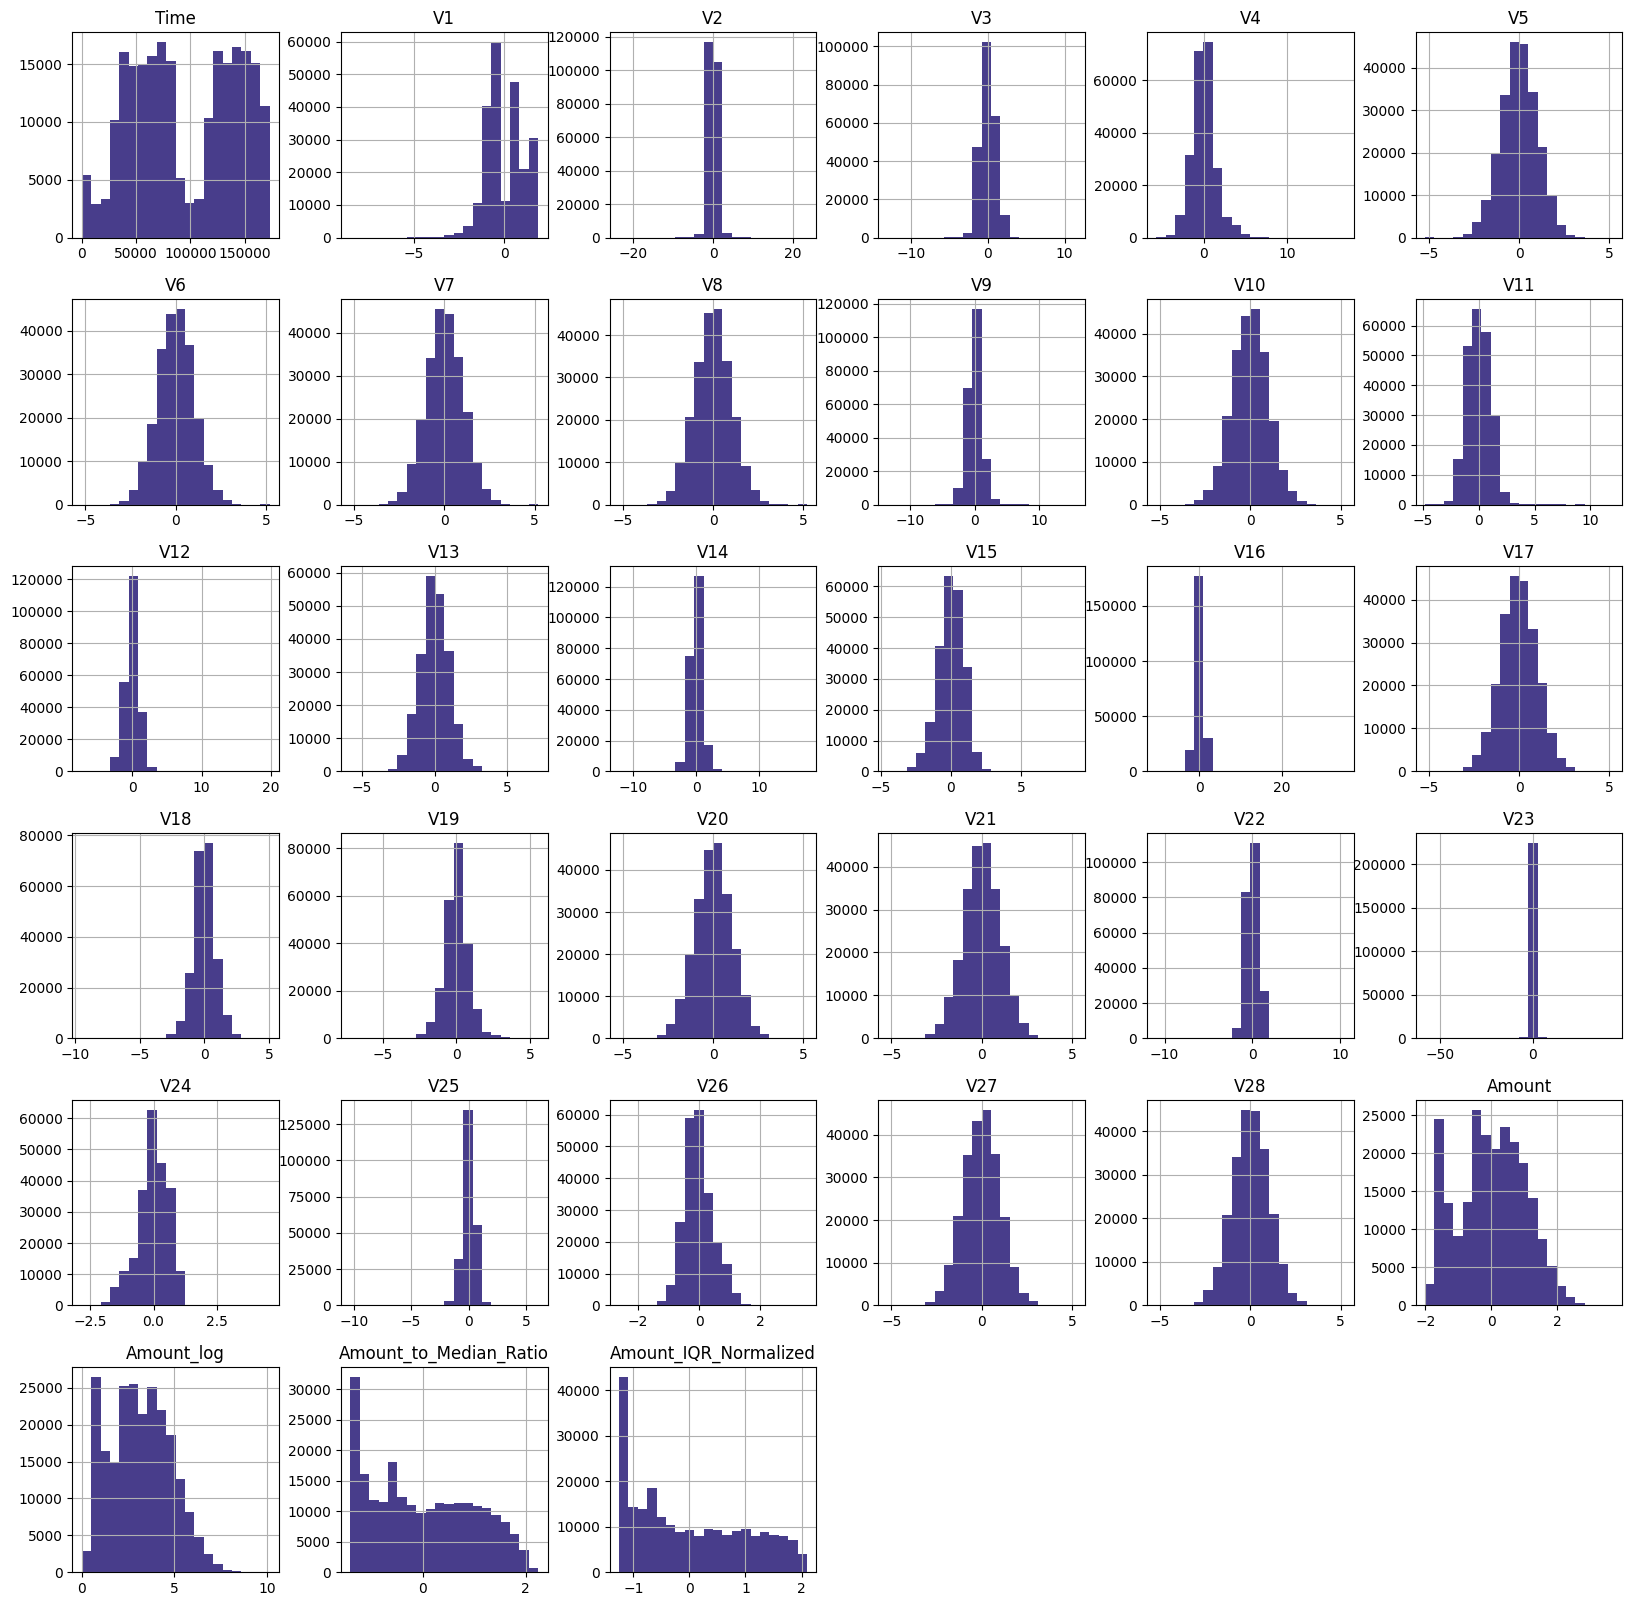

In [ ]:
X_train.hist(figsize=(20,20),bins=20,color='#483D8B')
plt.show()

Initially, the dataset showed significant skewness in several features, especially Amount and some PCA components. To address this, **the Yeo-Johnson** transformation was applied, as it can handle both positive and negative values unlike log-transformations.

While this reduced skewness for many features, *some variables remained
non-Gaussian and showed heavy tails* . Therefore, a **Quantile Transformer** was
subsequently applied to map the data to a uniform distribution and then approximate a normal distribution.

This two-step transformation significantly improved feature distributions, making them more suitable for clustering and anomaly detection models.

# Scaling

In [ ]:
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA

In [ ]:
pca=PCA().fit(X_train_scaled)

In [ ]:
eigenvalues=pca.explained_variance_
eigenvalues

array([4.51129810e+00, 2.13957903e+00, 1.85817085e+00, 1.65474737e+00,
       1.43409011e+00, 1.35974334e+00, 1.29744425e+00, 1.25682797e+00,
       1.16868271e+00, 1.15398953e+00, 1.08173478e+00, 1.06354316e+00,
       1.02280494e+00, 1.00917174e+00, 1.00124589e+00, 9.98926810e-01,
       9.90539542e-01, 9.69086582e-01, 9.47330484e-01, 9.44973057e-01,
       9.05700965e-01, 8.03341593e-01, 5.82782888e-01, 5.35256152e-01,
       4.88679513e-01, 4.42096292e-01, 3.86703797e-01, 3.37729521e-01,
       3.28884249e-01, 2.88571868e-01, 3.58302855e-02, 5.43009508e-04,
       9.44720012e-05])

pca.explained_variance_ returns the **eigenvalues** corresponding to each principal component. These values represent the **amount of variance** captured by each component in the transformed feature space.

This means:
- The **first principal component** captures 2.65 units of variance from the original data.
- The **second principal component** captures 2.16 units.
- The **third principal component** captures 1.85 units, and so on.

Larger eigenvalues indicate that the component explains more variability in the data. PCA arranges components in decreasing order of these values, so the first components are the most informative. These eigenvalues are also used to compute the explained variance ratio, which helps in selecting the number of components to retain.




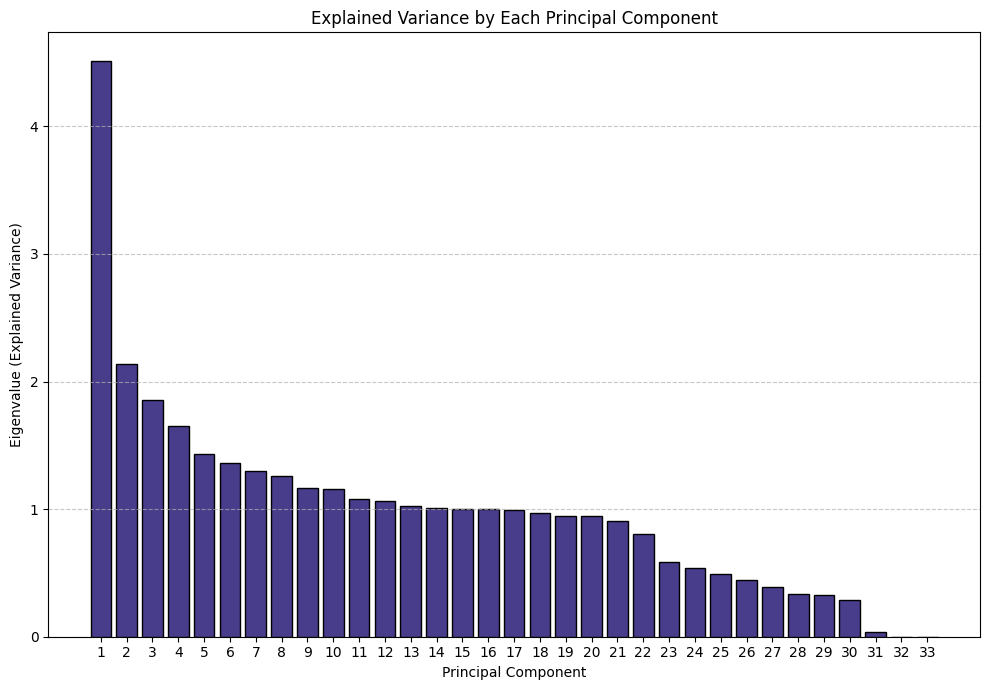

In [ ]:
components = np.arange(1, len(eigenvalues) + 1)

plt.figure(figsize=(10, 7))
plt.bar(components, eigenvalues, color='#483D8B', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(components)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
cumulativeVariance=np.cumsum(pca.explained_variance_ratio_)#This line calculates the cumulative sum of the variance explained by each principal component in PCA
cumulativeVariance

array([0.1367054 , 0.20154085, 0.25784881, 0.30799245, 0.35144953,
       0.39265369, 0.43197001, 0.47005554, 0.50547002, 0.54043924,
       0.57321894, 0.60544738, 0.63644133, 0.66702216, 0.69736281,
       0.72763319, 0.75764941, 0.78701554, 0.81572239, 0.84435782,
       0.87180318, 0.89614676, 0.91380677, 0.93002658, 0.94483498,
       0.95823178, 0.96995003, 0.98018421, 0.99015036, 0.99889492,
       0.99998068, 0.99999714, 1.        ])

The goal is to calculate the total variance explained by the first n principal components, helping decide how many components are needed to capture a desired percentage of the total variance.

In [ ]:
n_components=np.argmax(cumulativeVariance>=0.93)+1 #Determines the number of principal components needed to retain at least 93% of the cumulative variance in PCA
print('The number of principal component is:' ,n_components)

The number of principal component is: 24


The number of principal components was set to 25, based on the analysis of the explained variance ratio, where it was observed that the first 25 components account for a significant portion of the total variance in the data. Additionally, the eigenvalues of these components were relatively high compared to the subsequent components, supporting the selection of this number as a sufficiently representative set without losing important information.

In [ ]:
plt.figure(figsize=(10,6))
fig = go.Figure()
#cumulative variance plot
fig.add_trace(go.Scatter(x=list(range(1, len(cumulativeVariance) + 1)),
                         y=cumulativeVariance,
                         mode='markers+lines',
                         name='Cumulative Variance',
                         marker=dict(color='#483D8B')
                        ))

# Add the 95% threshold line
fig.add_trace(go.Scatter(x=[1, len(cumulativeVariance)],
                         y=[0.93, 0.93],
                         mode='lines',
                         name='93% Threshold',
                         line=dict(dash='dash'),
                         marker=dict(color='#E7F255')
                        ))


fig.update_layout(
    title="Cumulative Variance vs Number of Principal Components",
    xaxis_title="Number of Principal Components",
    yaxis_title="Cumulative Variance Percentage",
    template="plotly_dark",
    showlegend=True
)

fig.show()


<Figure size 1000x600 with 0 Axes>

In [ ]:
print(X_train_scaled.shape)

(227845, 33)


In [ ]:
pca2=PCA(n_components=n_components)
X_train_pca=pca2.fit_transform(X_train_scaled)
X_test_pca=pca2.transform(X_test_scaled)

In [ ]:
print(X_train_pca.shape)

(227845, 24)


After applying PCA, the number of principal components was reduced while retaining 93% of the cumulative variance, resulting in a more efficient representation of the data with fewer dimensions

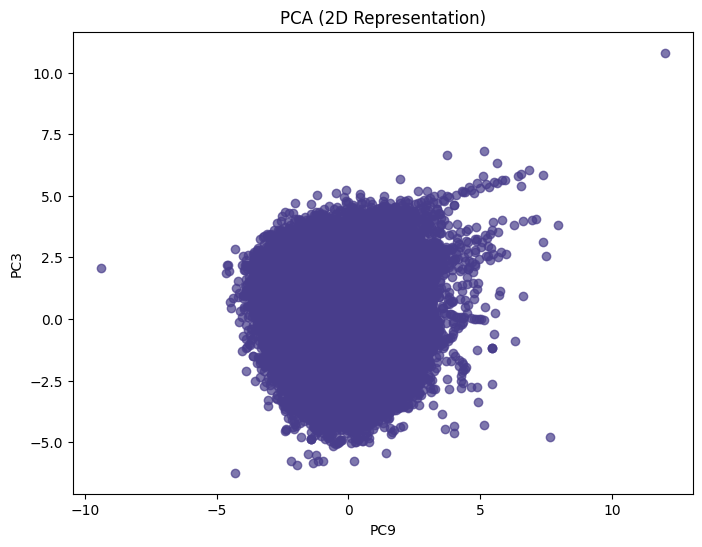

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,9], X_train_pca[:,3], alpha=0.7,color='#483D8B')# the components are chosen randomly
plt.title('PCA (2D Representation)')
plt.xlabel('PC9')
plt.ylabel('PC3')
plt.show()

# SMOTE ALGO

What is SMOTE?  

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance by creating synthetic examples of the minority class instead of just duplicating them.

We use the Smote algo because our dataset is highly imbalanced cause most models to be biased toward the majority class(Non-Fraudulent).

The requirements for this algo :

1-) Labeled classification task:Must have imbalanced labels (with y_train showing minority and majority classes).

2-)

In [ ]:
y_train.value_counts()

,count
Class,
0,227451
1,394


In [ ]:
print("Before SMOTE:", Counter(y_train))

#Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_pca, y_train)

# Check new class distribution
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


Text(0.5, 1.0, 'Class Distribution')

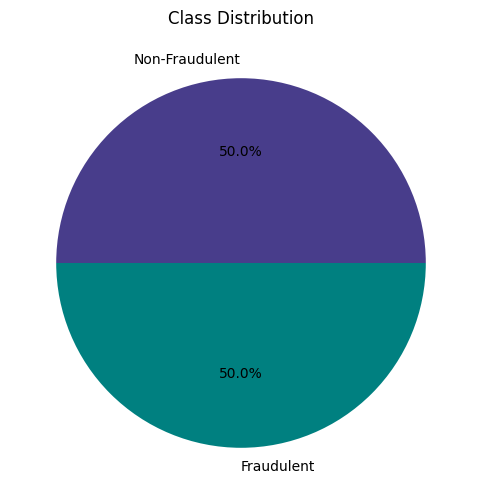

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(y_train_res.value_counts(),labels=['Non-Fraudulent','Fraudulent'],autopct='%1.1f%%',colors=['#483D8B','#008080'])
plt.title('Class Distribution')

In [ ]:
'''strategies = [0.4,0.5,0.6,0.7,0.8,'auto']




for strategy in strategies:
    print(f"\n===== Sampling Strategy: {strategy} =====")


    smote = SMOTE(sampling_strategy=strategy, random_state=42, k_neighbors=7)
    X_res, y_res = smote.fit_resample(X_train_scaled, y_train)


    clf = LogisticRegression(random_state=42)
    clf.fit(X_res, y_res)


    y_pred = clf.predict(X_test_scaled)

    print(classification_report(y_test, y_pred, digits=4))

    #--------------------------------------------------------------------
# We want to define values for the k_neighbors hyperparameter and sampling_strategy
strategies = [0.4, 0.5, 0.6, 0.7, 0.8, 'auto']
k_values = [3, 5, 7, 9]

for k in k_values:
    print(f"\n======================")
    print(f"Testing k_neighbors = {k}")

    for strategy in strategies:
        print(f"\n--- Sampling Strategy: {strategy} ---")

        # Apply SMOTE with current k and strategy
        smote = SMOTE(sampling_strategy=strategy, random_state=42, k_neighbors=k)
        X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

        print("Resampled Class Distribution:", Counter(y_res))

        # Train Logistic Regression
        clf = RandomForestClassifier(n_estimators=30,max_depth=10,random_state=42, n_jobs=-1)
        clf.fit(X_res, y_res)

        # Predict and evaluate
        y_pred = clf.predict(X_test_scaled)
        print(classification_report(y_test, y_pred, digits=4))'''

'strategies = [0.4,0.5,0.6,0.7,0.8,\'auto\']\n\n\n\n\nfor strategy in strategies:\n    print(f"\n===== Sampling Strategy: {strategy} =====")\n\n\n    smote = SMOTE(sampling_strategy=strategy, random_state=42, k_neighbors=7)\n    X_res, y_res = smote.fit_resample(X_train_scaled, y_train)\n\n\n    clf = LogisticRegression(random_state=42)\n    clf.fit(X_res, y_res)\n\n\n    y_pred = clf.predict(X_test_scaled)\n\n    print(classification_report(y_test, y_pred, digits=4))\n\n    #--------------------------------------------------------------------\n# We want to define values for the k_neighbors hyperparameter and sampling_strategy\nstrategies = [0.4, 0.5, 0.6, 0.7, 0.8, \'auto\']\nk_values = [3, 5, 7, 9]\n\nfor k in k_values:\n    print(f"\n======================")\n    print(f"Testing k_neighbors = {k}")\n\n    for strategy in strategies:\n        print(f"\n--- Sampling Strategy: {strategy} ---")\n\n        # Apply SMOTE with current k and strategy\n        smote = SMOTE(sampling_strategy

======================
Testing k_neighbors = 3

--- Sampling Strategy: 0.4 ---
Resampled Class Distribution: Counter({0: 227451, 1: 90980})
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7297    0.8265    0.7751        98

    accuracy                         0.9992     56962
   macro avg     0.8647    0.9130    0.8874     56962
weighted avg     0.9992    0.9992    0.9992     56962


--- Sampling Strategy: 0.5 ---
Resampled Class Distribution: Counter({0: 227451, 1: 113725})
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     56864
           1     0.7723    0.7959    0.7839        98

    accuracy                         0.9992     56962
   macro avg     0.8860    0.8978    0.8918     56962
weighted avg     0.9993    0.9992    0.9993     56962


--- Sampling Strategy: 0.6 ---
Resampled Class Distribution: Counter({0: 227451, 1: 136470})
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9996     56864
           1     0.7222    0.7959    0.7573        98

    accuracy                         0.9991     56962
   macro avg     0.8609    0.8977    0.8784     56962
weighted avg     0.9992    0.9991    0.9991     56962


--- Sampling Strategy: 0.7 ---
Resampled Class Distribution: Counter({0: 227451, 1: 159215})
              precision    recall  f1-score   support

           0     0.9997    0.9991    0.9994     56864
           1     0.6172    0.8061    0.6991        98

    accuracy                         0.9988     56962
   macro avg     0.8084    0.9026    0.8493     56962
weighted avg     0.9990    0.9988    0.9989     56962


--- Sampling Strategy: 0.8 ---
Resampled Class Distribution: Counter({0: 227451, 1: 181960})
              precision    recall  f1-score   support

           0     0.9998    0.9990    0.9994     56864
           1     0.6000    0.8571    0.7059        98

    accuracy                         0.9988     56962
   macro avg     0.7999    0.9281    0.8526     56962
weighted avg     0.9991    0.9988    0.9989     56962


--- Sampling Strategy: auto ---
Resampled Class Distribution: Counter({0: 227451, 1: 227451})
              precision    recall  f1-score   support

           0     0.9997    0.9988    0.9993     56864
           1     0.5503    0.8367    0.6640        98

    accuracy                         0.9985     56962
   macro avg     0.7750    0.9178    0.8316     56962
weighted avg     0.9989    0.9985    0.9987     56962


======================
Testing k_neighbors = 5

--- Sampling Strategy: 0.4 ---
Resampled Class Distribution: Counter({0: 227451, 1: 90980})
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7593    0.8367    0.7961        98

    accuracy                         0.9993     56962
   macro avg     0.8795    0.9181    0.8979     56962
weighted avg     0.9993    0.9993    0.9993     56962


--- Sampling Strategy: 0.5 ---
Resampled Class Distribution: Counter({0: 227451, 1: 113725})
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7431    0.8265    0.7826        98

    accuracy                         0.9992     56962
   macro avg     0.8714    0.9130    0.8911     56962
weighted avg     0.9993    0.9992    0.9992     56962


--- Sampling Strategy: 0.6 ---
Resampled Class Distribution: Counter({0: 227451, 1: 136470})
              precision    recall  f1-score   support

           0     0.9997    0.9991    0.9994     56864
           1     0.6241    0.8469    0.7186        98

    accuracy                         0.9989     56962
   macro avg     0.8119    0.9230    0.8590     56962
weighted avg     0.9991    0.9989    0.9989     56962


--- Sampling Strategy: 0.7 ---
Resampled Class Distribution: Counter({0: 227451, 1: 159215})
              precision    recall  f1-score   support

           0     0.9997    0.9990    0.9994     56864
           1     0.5929    0.8469    0.6975        98

    accuracy                         0.9987     56962
   macro avg     0.7963    0.9230    0.8484     56962
weighted avg     0.9990    0.9987    0.9988     56962


--- Sampling Strategy: 0.8 ---
Resampled Class Distribution: Counter({0: 227451, 1: 181960})
              precision    recall  f1-score   support

           0     0.9997    0.9989    0.9993     56864
           1     0.5608    0.8469    0.6748        98

    accuracy                         0.9986     56962
   macro avg     0.7803    0.9229    0.8370     56962
weighted avg     0.9990    0.9986    0.9987     56962


--- Sampling Strategy: auto ---
Resampled Class Distribution: Counter({0: 227451, 1: 227451})
              precision    recall  f1-score   support

           0     0.9997    0.9983    0.9990     56864
           1     0.4551    0.8265    0.5870        98

    accuracy                         0.9980     56962
   macro avg     0.7274    0.9124    0.7930     56962
weighted avg     0.9988    0.9980    0.9983     56962


======================
Testing k_neighbors = 7

--- Sampling Strategy: 0.4 ---
Resampled Class Distribution: Counter({0: 227451, 1: 90980})
              precision    recall  f1-score   support

           0     0.9997    0.9993    0.9995     56864
           1     0.6780    0.8163    0.7407        98

    accuracy                         0.9990     56962
   macro avg     0.8388    0.9078    0.8701     56962
weighted avg     0.9991    0.9990    0.9991     56962


--- Sampling Strategy: 0.5 ---
Resampled Class Distribution: Counter({0: 227451, 1: 113725})
              precision    recall  f1-score   support

           0     0.9995    0.9994    0.9994     56864
           1     0.6604    0.7143    0.6863        98

    accuracy                         0.9989     56962
   macro avg     0.8299    0.8568    0.8429     56962
weighted avg     0.9989    0.9989    0.9989     56962


--- Sampling Strategy: 0.6 ---
Resampled Class Distribution: Counter({0: 227451, 1: 136470})
              precision    recall  f1-score   support

           0     0.9995    0.9990    0.9992     56864
           1     0.5397    0.6939    0.6071        98

    accuracy                         0.9985     56962
   macro avg     0.7696    0.8464    0.8032     56962
weighted avg     0.9987    0.9985    0.9986     56962


--- Sampling Strategy: 0.7 ---
Resampled Class Distribution: Counter({0: 227451, 1: 159215})
              precision    recall  f1-score   support

           0     0.9997    0.9988    0.9992     56864
           1     0.5359    0.8367    0.6534        98

    accuracy                         0.9985     56962
   macro avg     0.7678    0.9177    0.8263     56962
weighted avg     0.9989    0.9985    0.9986     56962


--- Sampling Strategy: 0.8 ---
Resampled Class Distribution: Counter({0: 227451, 1: 181960})
              precision    recall  f1-score   support

           0     0.9995    0.9983    0.9989     56864
           1     0.4176    0.7245    0.5299        98

    accuracy                         0.9978     56962
   macro avg     0.7086    0.8614    0.7644     56962
weighted avg     0.9985    0.9978    0.9981     56962


--- Sampling Strategy: auto ---
Resampled Class Distribution: Counter({0: 227451, 1: 227451})
              precision    recall  f1-score   support

           0     0.9997    0.9977    0.9987     56864
           1     0.3857    0.8265    0.5260        98

    accuracy                         0.9974     56962
   macro avg     0.6927    0.9121    0.7623     56962
weighted avg     0.9986    0.9974    0.9979     56962


======================
Testing k_neighbors = 9

--- Sampling Strategy: 0.4 ---
Resampled Class Distribution: Counter({0: 227451, 1: 90980})
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7431    0.8265    0.7826        98

    accuracy                         0.9992     56962
   macro avg     0.8714    0.9130    0.8911     56962
weighted avg     0.9993    0.9992    0.9992     56962


--- Sampling Strategy: 0.5 ---
Resampled Class Distribution: Counter({0: 227451, 1: 113725})
              precision    recall  f1-score   support

           0     0.9997    0.9990    0.9994     56864
           1     0.5912    0.8265    0.6894        98

    accuracy                         0.9987     56962
   macro avg     0.7955    0.9128    0.8444     56962
weighted avg     0.9990    0.9987    0.9988     56962


--- Sampling Strategy: 0.6 ---
Resampled Class Distribution: Counter({0: 227451, 1: 136470})
              precision    recall  f1-score   support

           0     0.9997    0.9990    0.9993     56864
           1     0.5857    0.8367    0.6891        98

    accuracy                         0.9987     56962
   macro avg     0.7927    0.9179    0.8442     56962
weighted avg     0.9990    0.9987    0.9988     56962


--- Sampling Strategy: 0.7 ---
Resampled Class Distribution: Counter({0: 227451, 1: 159215})
              precision    recall  f1-score   support

           0     0.9997    0.9985    0.9991     56864
           1     0.4848    0.8163    0.6084        98

    accuracy                         0.9982     56962
   macro avg     0.7423    0.9074    0.8037     56962
weighted avg     0.9988    0.9982    0.9984     56962


--- Sampling Strategy: 0.8 ---
Resampled Class Distribution: Counter({0: 227451, 1: 181960})
              precision    recall  f1-score   support

           0     0.9997    0.9983    0.9990     56864
           1     0.4659    0.8367    0.5985        98

    accuracy                         0.9981     56962
   macro avg     0.7328    0.9175    0.7988     56962
weighted avg     0.9988    0.9981    0.9983     56962


--- Sampling Strategy: auto ---
Resampled Class Distribution: Counter({0: 227451, 1: 227451})
              precision    recall  f1-score   support

           0     0.9996    0.9982    0.9989     56864
           1     0.4309    0.7959    0.5591        98

    accuracy                         0.9978     56962
   macro avg     0.7153    0.8971    0.7790     56962
weighted avg     0.9987    0.9978    0.9982     56962

the best combination of the parameters is

k_neighbors = 5 (the default value)

sampling_strategy = 0.4

In [ ]:
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.4, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train_pca, y_train)

# Check new class distribution
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 90980})


Text(0.5, 1.0, 'Class Distribution')

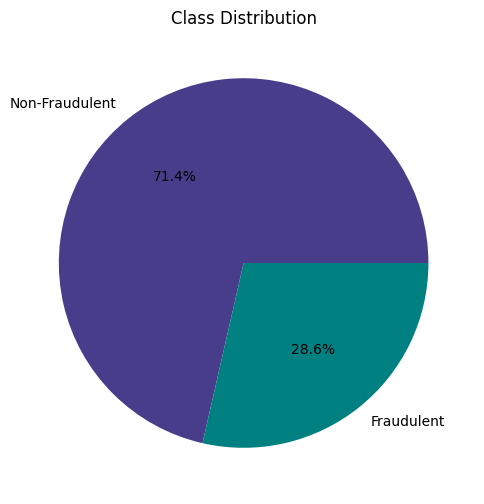

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(y_train_res.value_counts(),labels=['Non-Fraudulent','Fraudulent'],autopct='%1.1f%%',colors=['#483D8B','#008080'])
plt.title('Class Distribution')

# T-SNE

In [ ]:
X_sample,_=train_test_split(X_train_pca,train_size=0.04,random_state=42,stratify=y_train)
tsne=TSNE(n_components=1,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9113 samples in 0.001s...
[t-SNE] Computed neighbors for 9113 samples in 1.333s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9113
[t-SNE] Computed conditional probabilities for sample 2000 / 9113
[t-SNE] Computed conditional probabilities for sample 3000 / 9113
[t-SNE] Computed conditional probabilities for sample 4000 / 9113
[t-SNE] Computed conditional probabilities for sample 5000 / 9113
[t-SNE] Computed conditional probabilities for sample 6000 / 9113
[t-SNE] Computed conditional probabilities for sample 7000 / 9113
[t-SNE] Computed conditional probabilities for sample 8000 / 9113
[t-SNE] Computed conditional probabilities for sample 9000 / 9113
[t-SNE] Computed conditional probabilities for sample 9113 / 9113
[t-SNE] Mean sigma: 1.566606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.361771
[t-SNE] KL divergence after 500 iterations: 3.062677


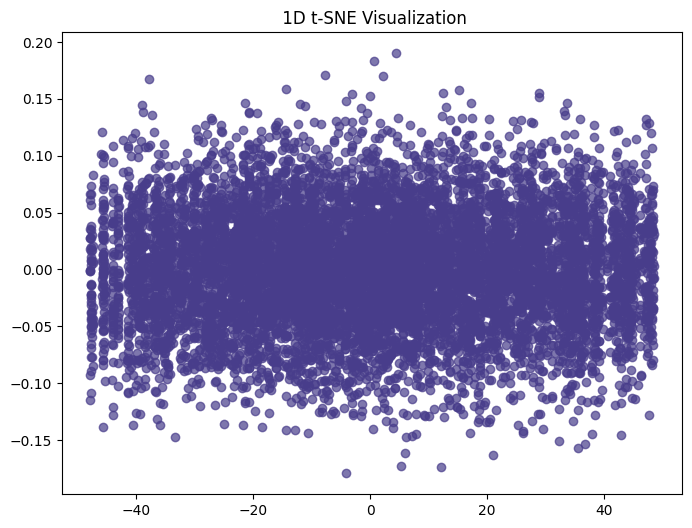

In [ ]:
plt.figure(figsize=(8, 6))
j = np.random.normal(0, 0.05, size=X_train_tsne.shape)
plt.scatter(X_train_tsne.flatten(),j.flatten(), alpha=0.7,color='#483D8B')
plt.title(' 1D t-SNE Visualization')
plt.show()

In [ ]:
tsne=TSNE(n_components=2,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9113 samples in 0.001s...
[t-SNE] Computed neighbors for 9113 samples in 0.903s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9113
[t-SNE] Computed conditional probabilities for sample 2000 / 9113
[t-SNE] Computed conditional probabilities for sample 3000 / 9113
[t-SNE] Computed conditional probabilities for sample 4000 / 9113
[t-SNE] Computed conditional probabilities for sample 5000 / 9113
[t-SNE] Computed conditional probabilities for sample 6000 / 9113
[t-SNE] Computed conditional probabilities for sample 7000 / 9113
[t-SNE] Computed conditional probabilities for sample 8000 / 9113
[t-SNE] Computed conditional probabilities for sample 9000 / 9113
[t-SNE] Computed conditional probabilities for sample 9113 / 9113
[t-SNE] Mean sigma: 1.566606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.001015
[t-SNE] KL divergence after 500 iterations: 2.011717


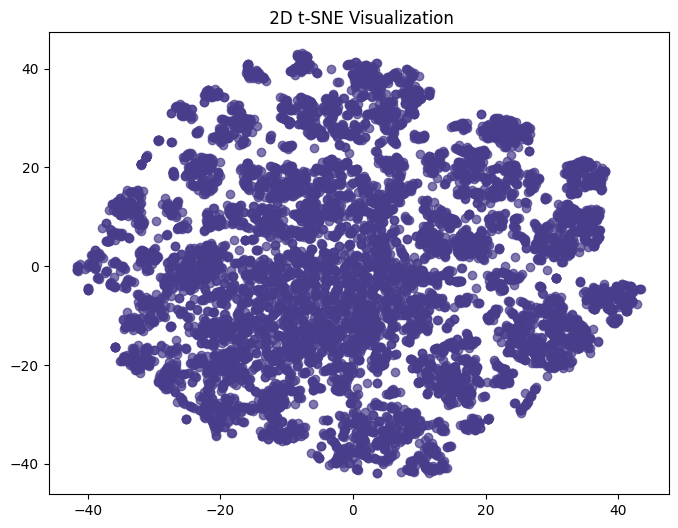

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.7,color='#483D8B')
plt.title(' 2D t-SNE Visualization')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
plt.show()

This t-SNE plot visualizes the high-dimensional data in two dimensions, where each point represents a data sample, and clusters indicate groups of similar samples in the original feature space

In [ ]:
tsne=TSNE(n_components=3,random_state=42,perplexity=30,max_iter=500,verbose=1)
X_train_tsne=tsne.fit_transform(X_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9113 samples in 0.001s...
[t-SNE] Computed neighbors for 9113 samples in 0.937s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9113
[t-SNE] Computed conditional probabilities for sample 2000 / 9113
[t-SNE] Computed conditional probabilities for sample 3000 / 9113
[t-SNE] Computed conditional probabilities for sample 4000 / 9113
[t-SNE] Computed conditional probabilities for sample 5000 / 9113
[t-SNE] Computed conditional probabilities for sample 6000 / 9113
[t-SNE] Computed conditional probabilities for sample 7000 / 9113
[t-SNE] Computed conditional probabilities for sample 8000 / 9113
[t-SNE] Computed conditional probabilities for sample 9000 / 9113
[t-SNE] Computed conditional probabilities for sample 9113 / 9113
[t-SNE] Mean sigma: 1.566606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.759277
[t-SNE] KL divergence after 500 iterations: 1.715716


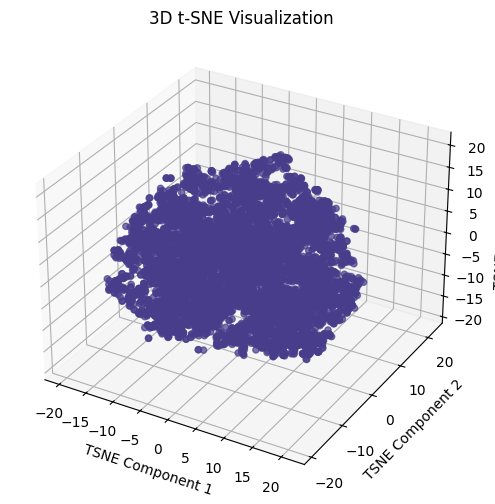

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], alpha=0.7,color='#483D8B')
ax.set_title('3D t-SNE Visualization')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')

plt.show()

This 3D t-SNE plot visualizes high-dimensional data reduced to three components, where each point represents a data sample, and the spatial distribution reflects similarities among samples in the original space

# **Anomaly Detection : Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,confusion_matrix

Xsample, x_test_iso, ysample, y_test_iso = train_test_split(X_train_res, y_train_res, train_size=0.2, random_state=42, stratify=y_train_res)
iso_model = IsolationForest(n_estimators= 150, max_samples=256, contamination= 0.1, max_features= 0.75)
iso_model.fit(Xsample)
y_pred = iso_model.predict(x_test_iso)
print(y_pred)
y_pred_f=np.where(y_pred==-1,1,0)
print(y_pred_f)

[ 1 -1  1 ...  1  1  1]
[0 1 0 ... 0 0 0]


The Isolation Forest model has been trained to identify fraud transaction based on the patterns learned from the data set

The x_test_iso classify each sample  as either an an outlier(-1) or inlier(1)
so I used the actual fraud labels because the dataset labels is between (0) outlier and (1) inlier

**contamination** refers to the expected proportion of anomalies (outliers) in the dataset. It is a key parameter that influences how the algorithm defines what is an outlier.


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87    181961
           1       0.85      0.30      0.44     72784

    accuracy                           0.78    254745
   macro avg       0.81      0.64      0.65    254745
weighted avg       0.80      0.78      0.74    254745

[[178134   3827]
 [ 51265  21519]]


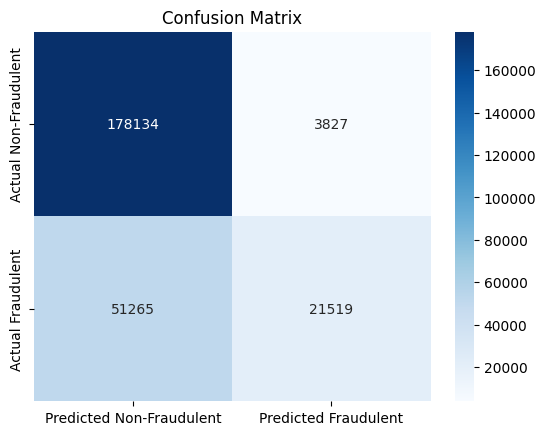

In [ ]:
print("Isolation Forest Classification Report:")
print(classification_report(y_test_iso, y_pred_f))
print(confusion_matrix(y_test_iso, y_pred_f))
cm=confusion_matrix(y_test_iso, y_pred_f)
cmdf=pd.DataFrame(cm,columns=['Predicted Non-Fraudulent','Predicted Fraudulent'],index=['Actual Non-Fraudulent','Actual Fraudulent'])
sns.heatmap(cmdf,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

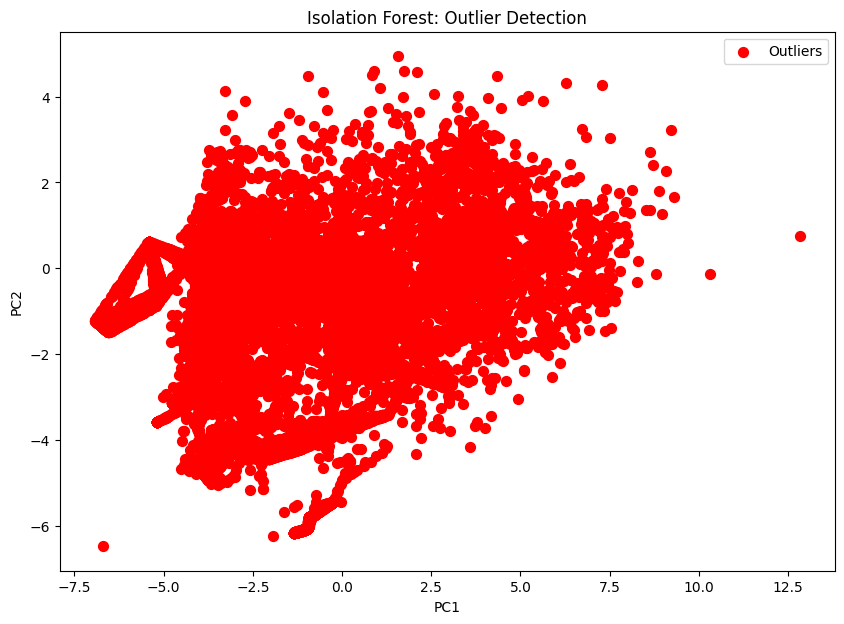

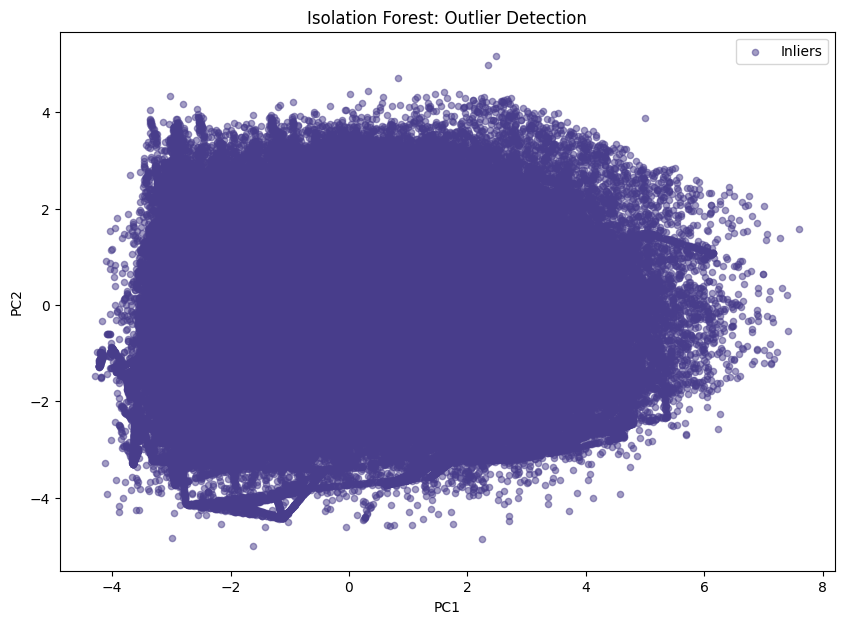

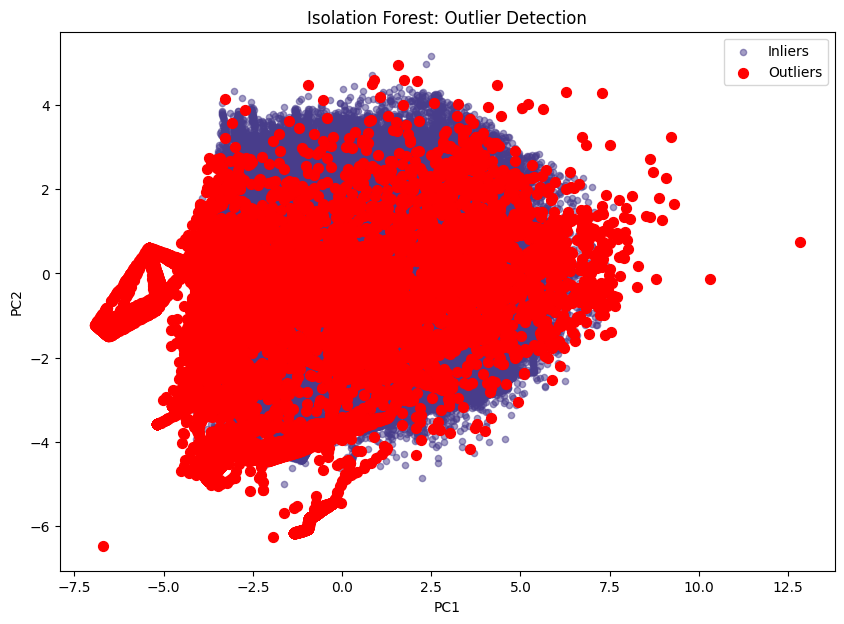

In [ ]:
outliers = x_test_iso[y_pred == -1]
inliers = x_test_iso[y_pred == 1]

plt.figure(figsize=(10, 7))
#plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', c='#483D8B', s=20, alpha=0.5)
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', c='red', s=50, marker='o')
plt.title('Isolation Forest: Outlier Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

outliers = x_test_iso[y_pred == -1]
inliers = x_test_iso[y_pred == 1]

plt.figure(figsize=(10, 7))
plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', c='#483D8B', s=20, alpha=0.5)
#plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', c='red', s=50, marker='o')
plt.title('Isolation Forest: Outlier Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

outliers = x_test_iso[y_pred == -1]
inliers = x_test_iso[y_pred == 1]

plt.figure(figsize=(10, 7))
plt.scatter(inliers[:, 0], inliers[:, 1], label='Inliers', c='#483D8B', s=20, alpha=0.5)
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', c='red', s=50, marker='o')
plt.title('Isolation Forest: Outlier Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [256, 512, 1000,2000],
    'contamination': [0.03, 0.08,0.2,0.3],
    'max_features': [0.5, 0.75, 1.0]
}

best_f1 = 0
best_params = None
best_model = None
for n_estimators in param_grid['n_estimators']:
    for max_samples in param_grid['max_samples']:
        for contamination in param_grid['contamination']:
            for max_features in param_grid['max_features']:
                model = IsolationForest(n_estimators=n_estimators, max_samples=max_samples,contamination=contamination,max_features=max_features, random_state=0
                )
                model.fit(Xsample)
                y_pred = model.predict(x_test_iso)
                y_pred_f = np.where(y_pred == -1, 1, 0)
                current_f1 = f1_score(y_test_iso, y_pred_f)
                if current_f1 > best_f1:
                    best_f1 = current_f1
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_samples': max_samples,
                        'contamination': contamination,
                        'max_features': max_features
                    }
                    best_model = model

                print(f"Params: n_estimators={n_estimators}, max_samples={max_samples}, contamination={contamination}, max_features={max_features} --> F1: {current_f1:.4f}")

print("\nBest F1 Score:", best_f1)
print("Best Parameters:", best_params)

y_pred_best = best_model.predict(x_test_iso)
y_pred_best_f = np.where(y_pred_best == -1, 1, 0)

print("\nClassification Report for Best Model:")
print(classification_report(y_test_iso, y_pred_best_f))

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test_iso, y_pred_best_f))


Params: n_estimators=50, max_samples=256, contamination=0.03, max_features=0.5 --> F1: 0.1667
Params: n_estimators=50, max_samples=256, contamination=0.03, max_features=0.75 --> F1: 0.1686
Params: n_estimators=50, max_samples=256, contamination=0.03, max_features=1.0 --> F1: 0.1680
Params: n_estimators=50, max_samples=256, contamination=0.08, max_features=0.5 --> F1: 0.3616
Params: n_estimators=50, max_samples=256, contamination=0.08, max_features=0.75 --> F1: 0.3586
Params: n_estimators=50, max_samples=256, contamination=0.08, max_features=1.0 --> F1: 0.3675
Params: n_estimators=50, max_samples=256, contamination=0.2, max_features=0.5 --> F1: 0.4781
Params: n_estimators=50, max_samples=256, contamination=0.2, max_features=0.75 --> F1: 0.5080
Params: n_estimators=50, max_samples=256, contamination=0.2, max_features=1.0 --> F1: 0.5221
Params: n_estimators=50, max_samples=256, contamination=0.3, max_features=0.5 --> F1: 0.4864
Params: n_estimators=50, max_samples=256, contamination=0.3, 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-64-3dad5a3a0823>", line 22, in <cell line: 0>
    y_pred = model.predict(x_test_iso)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py", line 420, in predict
    decision_func = self.decision_function(X)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py", line 474, in decision_function
    return self.score_samples(X) - self.offset_
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py", line 528, in score_samples
    return self._score_samples(X)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_iforest.py", line 540, in _score_sa

TypeError: object of type 'NoneType' has no len()

In [ ]:

X_train_norm = X_train_pca[y_train == 0]
oc_svm = OneClassSVM(kernel='rbf', gamma=0.4, nu=0.1)
oc_svm.fit(X_train_norm)

y_pred_test = oc_svm.predict(X_test_pca)
y_pred_mapped = np.where(y_pred_test == 1, 0, 1)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mapped))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mapped, digits=4))

In [ ]:
print(np.unique(y_pred_test))
print(np.unique(y_pred_mapped))

[-1  1]
[0 1]


In [ ]:
# Get anomaly scores
scores = oc_svm.decision_function(X_test_pca)

# Try a threshold (e.g., bottom 2% of scores are frauds)
threshold = np.percentile(scores, 2)

# Predict based on threshold
y_pred_thresh = np.where(scores < threshold, 1, 0)

# Evaluate
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh, digits=4))


[[55726  1138]
 [   96     2]]
              precision    recall  f1-score   support

           0     0.9983    0.9800    0.9890     56864
           1     0.0018    0.0204    0.0032        98

    accuracy                         0.9783     56962
   macro avg     0.5000    0.5002    0.4961     56962
weighted avg     0.9966    0.9783    0.9874     56962



Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.00      0.02      0.00        98

    accuracy                           0.98     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      0.98      0.99     56962

[[55726  1138]
 [   96     2]]


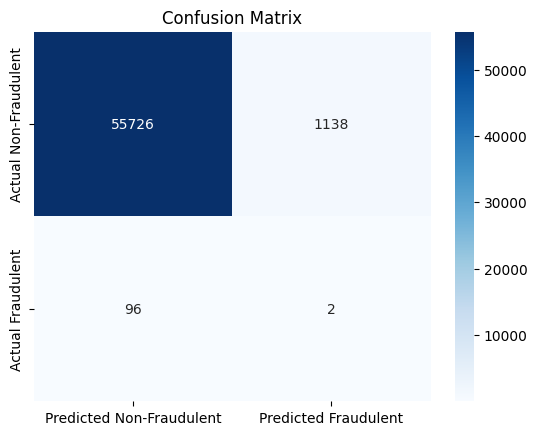

In [ ]:
print("Isolation Forest Classification Report:")
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))
cm=confusion_matrix(y_test, y_pred_thresh)
cmdf=pd.DataFrame(cm,columns=['Predicted Non-Fraudulent','Predicted Fraudulent'],index=['Actual Non-Fraudulent','Actual Fraudulent'])
sns.heatmap(cmdf,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

X_train_norm = X_train_res[y_train_res  == 0]
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
oc_svm.fit(X_train_norm)

y_pred_test = oc_svm.predict(X_test_pca)
y_pred_mapped = np.where(y_pred_test == 1, 0, 1)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mapped))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mapped, digits=4))

Confusion Matrix:
 [[23535 33329]
 [   19    79]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.4139    0.5853     56864
           1     0.0024    0.8061    0.0047        98

    accuracy                         0.4146     56962
   macro avg     0.5008    0.6100    0.2950     56962
weighted avg     0.9975    0.4146    0.5843     56962

